# Homework 3 (40 points)

### Due: Monday Oct 14, at 11:59pm via Blackboard

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["figure.figsize"]=10,6

## Problem 1: Peformance of Large vs. Small Companies

Companies vary greatly in size. This variation can hide how well a company is performing. Rather than looking at the raw profit numbers, analysts consider financial ratios that adjust for the size of the company. A popular ratio is the return on assets, defined as:

**Return on Assets $= Net Income/Total Assets$**

Net income is another name for profits, and the total assets of a company is the value of everything it owns that is used to produce profits. The return on assets indicates how much profit the company generates relative to the amount that it invested to make that profit. A company with losses rather than profits has a negative return on assets. 

**Data:** The data set `Company.csv` gives the company name, total assets (in Millions \$), net income (in Millions \$), and the number of employees reported by 167 retailers in the United States. 

In the following questions, you will be performing an **exploratory data analysis (EDA)** for the given companies data. 

In [93]:
#Read the data. Name the dataset 'company'

company = pd.read_csv('Company.csv')
company

,Company Name,Total Assets (M$),Net Income (M$),# Employees
0,1-800-FLOWERS.COM,256,-4,2200
1,99 CENTS ONLY STORES,824,74,12000
2,A.C. MOORE ARTS & CRAFTS INC,237,-30,4710
3,ABERCROMBIE & FITCH -CL A,2948,150,85000
4,ADVANCE AUTO PARTS INC,3354,346,51017
...,...,...,...,...
162,WHOLE FOODS MARKET INC,3987,246,58300
163,WILLIAMS-SONOMA INC,2132,200,28000
164,WINN-DIXIE STORES INC,1838,29,49000
165,ZALE CORP,1160,-94,12800


In [95]:
company.describe()

,Total Assets (M$),Net Income (M$),# Employees
count,167.000000,167.000000,1.670000e+02
mean,5286.940120,334.287425,4.938518e+04
std,16119.785903,1384.886034,1.730055e+05
min,102.000000,-1510.000000,1.930000e+02
25%,348.000000,2.500000,4.119500e+03
50%,992.000000,34.000000,1.270000e+04
75%,3039.500000,191.000000,3.530000e+04
max,180663.000000,16389.000000,2.100000e+06


### 1a. (2 points) Compute and report (in a short paragraph of text) the following summary statistics for the `Net Income (M\$)` data (round your values to the nearest integer). Hint: Use the Round Function

    - Mean
    - Median
    - Standard Deviation
    - Range
    - IQR 

In [97]:
# mean

mean_net_income = round(company['Net Income (M$)'].mean())
mean_net_income

334

In [99]:
# median 

median_net_income = round(company['Net Income (M$)'].median())
median_net_income

34

In [101]:
# standard deviation 

std_net_income = round(company['Net Income (M$)'].std())
std_net_income

1385

In [103]:
# range 

range_net_income = round(company['Net Income (M$)'].max() - company['Net Income (M$)'].min())
range_net_income

17899

In [105]:
# IQR 

iqr_net_income = round(company['Net Income (M$)'].quantile(0.75) - company['Net Income (M$)'].quantile(0.25))
iqr_net_income

188

In [133]:
# Paragraph

print(f'The Net Income (M$) data for the dataset reveals several key statistics. The mean net income is ${mean_net_income} million, indicating an average profitability level across the companies. The median, at {median_net_income} million, suggests a skew towards higher incomes, with some companies earning significantly more. The standard deviation is ${std_net_income} million, reflecting high variability in net income figures. The range extends from a minimum of -${abs(round(company['Net Income (M$)'].min()))} million to a maximum of ${round(company['Net Income (M$)'].max())} million, highlighting substantial differences in company performance. The interquartile range (IQR) is ${iqr_net_income} million, showing the spread of the middle 50% of data points. These statistics provide a comprehensive overview of the net income distribution among the analyzed companies.')


The Net Income (M$) data for the dataset reveals several key statistics. The mean net income is $334 million, indicating an average profitability level across the companies. The median, at 34 million, suggests a skew towards higher incomes, with some companies earning significantly more. The standard deviation is $1385 million, reflecting high variability in net income figures. The range extends from a minimum of -$1510 million to a maximum of $16389 million, highlighting substantial differences in company performance. The interquartile range (IQR) is $188 million, showing the spread of the middle 50% of data points. These statistics provide a comprehensive overview of the net income distribution among the analyzed companies.


### (2 points) Create a heatmap for the dataset company. Can Net income be a factor determining Return on Assets? Briefly Explain.

<Axes: >

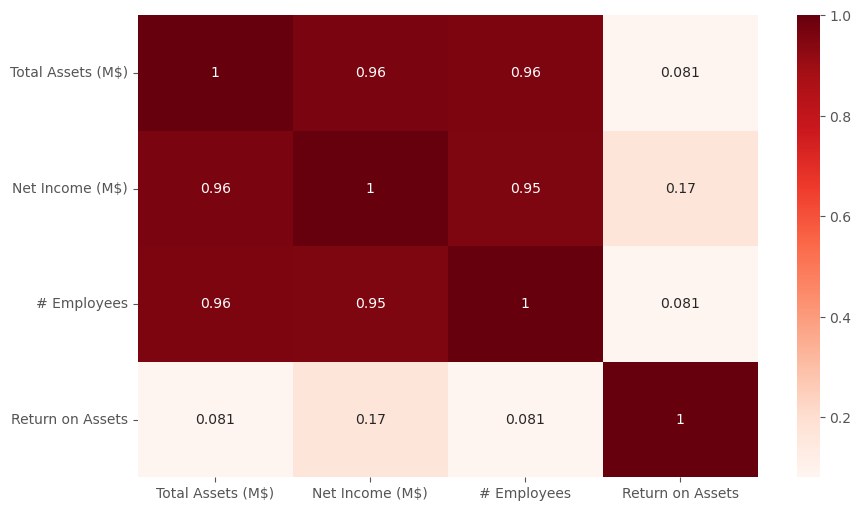

In [127]:
company_matrix = company.corr(numeric_only = True)
sns.heatmap(company_matrix, annot=True, cmap='Reds')

The correlation between Net Income and Return on Assets is 0.17. This indicates a weak positive relationship, suggesting that while Net Income has some influence on ROA, it's not a strong determinant.

### 1b. (2 points) Report the proportion of companies that inccured losses. For this question, you are expected to add a new categorical variable to the dataset (call it `Profit`) with two levels: `PROFIT` if the net income is above zero (net income >= 0) and `LOSS` if the net income is below zero (net income < 0). 



In [135]:
company['Profit'] = company['Net Income (M$)'].apply(lambda x: 'PROFIT' if x >= 0 else 'LOSS')
company['Profit']

0        LOSS
1      PROFIT
2        LOSS
3      PROFIT
4      PROFIT
        ...  
162    PROFIT
163    PROFIT
164    PROFIT
165      LOSS
166    PROFIT
Name: Profit, Length: 167, dtype: object

In [146]:
profit_distribution = company['Profit'].value_counts(normalize=True)
profit_distribution.name = 'Profit'

profit_distribution

Profit
PROFIT    0.766467
LOSS      0.233533
Name: Profit, dtype: float64

In [148]:
company

,Company Name,Total Assets (M$),Net Income (M$),# Employees,Return on Assets,Profit
0,1-800-FLOWERS.COM,256,-4,2200,-0.015625,LOSS
1,99 CENTS ONLY STORES,824,74,12000,0.089806,PROFIT
2,A.C. MOORE ARTS & CRAFTS INC,237,-30,4710,-0.126582,LOSS
3,ABERCROMBIE & FITCH -CL A,2948,150,85000,0.050882,PROFIT
4,ADVANCE AUTO PARTS INC,3354,346,51017,0.103160,PROFIT
...,...,...,...,...,...,...
162,WHOLE FOODS MARKET INC,3987,246,58300,0.061701,PROFIT
163,WILLIAMS-SONOMA INC,2132,200,28000,0.093809,PROFIT
164,WINN-DIXIE STORES INC,1838,29,49000,0.015778,PROFIT
165,ZALE CORP,1160,-94,12800,-0.081034,LOSS


### 1c. (2 points) What is the shape of the distribution of the variable `Net Income (M$)`? For this question, you are expected to create **both** a histogram and a boxplot (eliminate outliers), and comment about the shape of the distribution and if there are any companies with an outlier net income.

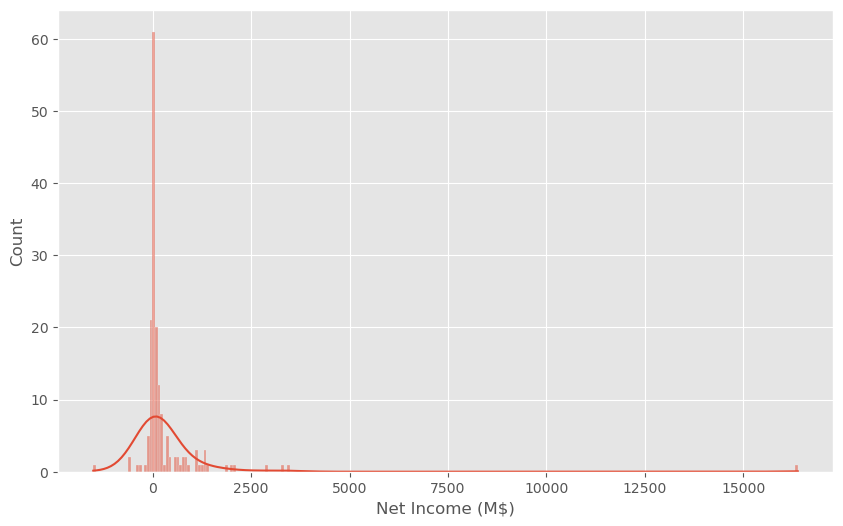

In [150]:
# Histogram

plt.figure(figsize=(10, 6))
sns.histplot(company['Net Income (M$)'], kde=True)
plt.show()

- Distribution: The histogram of Net Income (M$) shows a distribution that is heavily right-skewed, indicating that most companies have net incomes clustered around the lower end, with a few companies having significantly higher net incomes. This skewness is typical in financial data, where a small number of companies can have very large profits.

- Outliers: The presence of extreme values, such as $16,389 million and $12,000 million, suggests outliers in the dataset. These outliers can significantly impact the mean and standard deviation. The histogram indicates that while most companies have modest net incomes, a few outliers with very high net incomes exist. These outliers should be considered carefully in any further analysis or modeling to avoid skewed results.

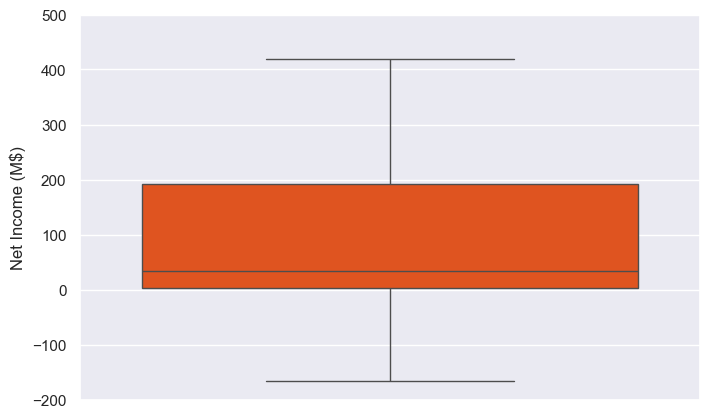

In [194]:
# Boxplot

plt.figure(figsize=(8, 5))
sns.boxplot(y='Net Income (M$)', data=company, color='orangered')
plt.ylim(-200, 500)
plt.ylabel('Net Income (M$)')
plt.show()

- Distribution: The boxplot appears relatively symmetrical, suggesting a balanced distribution around the median. The interquartile range (IQR) is wide, indicating variability in net income among companies.
- Outliers: The whiskers extend beyond the typical range, suggesting potential outliers.

### 1d. (2 points) A company that has more than 5000 employees is considered a large one, otherwise it is cosidered small. Create a new categroical variable (call it `Company Size`) with two levels: `LARGE` if the number of employees is greater than 5000 (employees > 5000), and `SMALL` otherwise (employees <=5000). What is the % of large and small companies in the dataset?

In [168]:
company['Company Size'] = company['# Employees'].apply(lambda x: 'LARGE' if x > 5000 else 'SMALL')

In [170]:
# % of large and small companies in the dataset.

company_size_proportion = company['Company Size'].value_counts(normalize=True) * 100
company_size_proportion.name = 'Company Size'
company_size_proportion

Company Size
LARGE    68.862275
SMALL    31.137725
Name: Company Size, dtype: float64

### 1e. (2 points) Create a side-by-side boxplots, on a single graph, to compare the distribtution of `Net Income (M$)` for both Large and Small companies eliminating the outliers. What does this graph tell you about the net income for both types of companies?

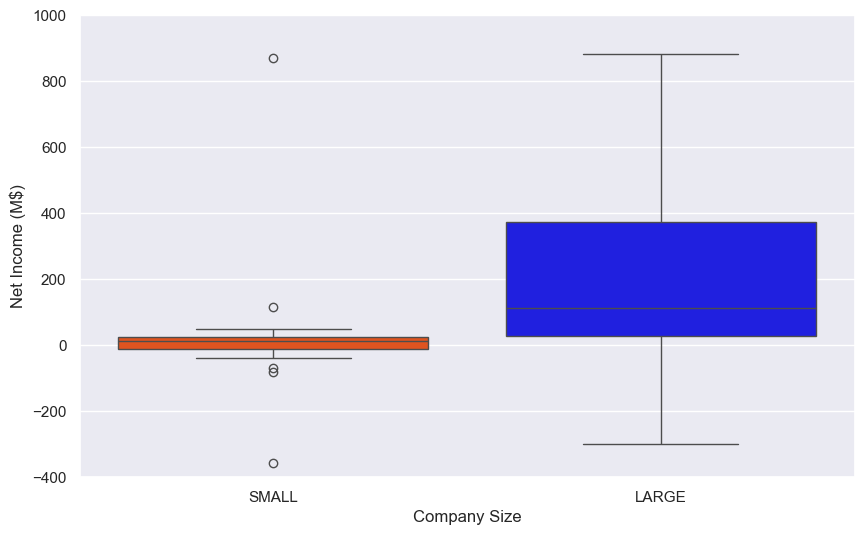

In [213]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company Size', y='Net Income (M$)', hue='Company Size', data=company, legend=False, order=['SMALL', 'LARGE'], palette={'SMALL': 'orangered', 'LARGE': 'blue'})
plt.ylim(-400, 1000)
plt.ylabel('Net Income (M$)')
plt.xlabel('Company Size')
plt.show()

- Small Companies: The net income for small companies is concentrated around the lower end, with a narrower interquartile range (IQR). There are several outliers on both the positive and negative sides, indicating variability in performance among small companies.

- Large Companies: Large companies have a wider IQR, suggesting greater variability in net income. The median net income for large companies is higher than for small companies, indicating generally better performance. There are fewer extreme outliers compared to small companies, with the distribution extending more symmetrically.

### 1f. (3 points) A better way to assess the performance of companies is to look at their `Return on Assets` instead of looking only at net income. The return on assets indicates how much profit the company generates relative to the amount that it invested to make profits. 

- Create a new numerical variable (call it `Return on Assets`) based on the formula: **Return on Assets = Net Income/Total Assets**. 

- What is the shape of the distribution of the variable `Return on Assets`? For this question, you are expected to create **both** a histogram, using Seaborn's histplot and a boxplot, to distinguish between large and small companies, and comment about the shape of the distribution and if there are any companies with an outlier return on assets value.

- Create side-by-side boxplots, on a single graph, to compare the distribtution of `Return on Assets` for both Large and Small companies. What does this graph tell you about the return on assets for both types of companies?

In [226]:
company['Return on Assets'] = company['Net Income (M$)'] / company['Total Assets (M$)']
company['Return on Assets']

0     -0.015625
1      0.089806
2     -0.126582
3      0.050882
4      0.103160
         ...   
162    0.061701
163    0.093809
164    0.015778
165   -0.081034
166    0.079470
Name: Return on Assets, Length: 167, dtype: float64

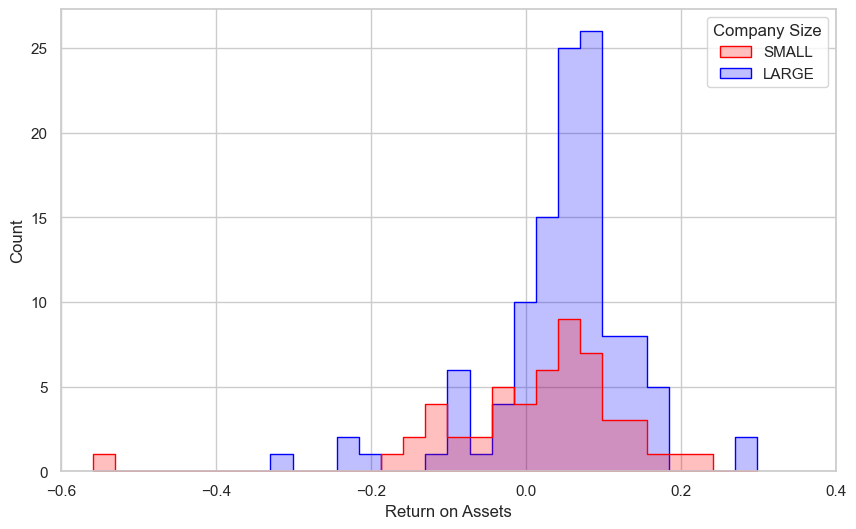

In [334]:
# Histplot

plt.figure(figsize=(10, 6))
sns.histplot(data=company, x='Return on Assets', hue='Company Size', bins=30, element='step', palette={'SMALL': 'red', 'LARGE': 'blue'})
plt.xlabel('Return on Assets')
plt.ylabel('Count')
plt.xlim(-0.6, 0.4)
plt.show()

- Distribution: The distribution is roughly symmetrical around zero, indicating that most companies have ROA values close to the average. Both small and large companies have a similar spread, with most values concentrated near the center.
- Outliers: There are a few extreme values on both ends, suggesting potential outliers. These could be companies with unusually high or low ROA. Outliers can affect the overall analysis by skewing averages and other statistics.

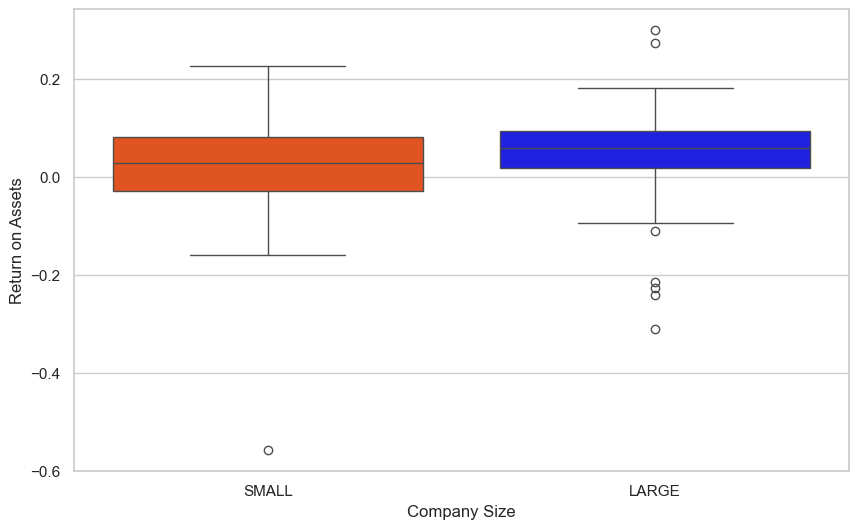

In [336]:
# Side-by-side boxplots

plt.figure(figsize=(10, 6))
sns.boxplot(x='Company Size', y='Return on Assets', data=company, hue='Company Size', legend=False, palette={'SMALL': 'orangered', 'LARGE': 'blue'})
plt.show()

- Small Companies: The median return on assets is slightly above zero, indicating modest profitability. The interquartile range (IQR) is relatively narrow, suggesting consistent performance among small companies. There are fewer extreme values, indicating less variability in returns.
- Large Companies: The median is similar to small companies but with a slightly wider spread. The IQR is broader, indicating greater variability in performance. There are more outliers, suggesting some large companies experience significantly different returns.

### 1g. (3 points) Create a scatterplot of Total Assets (x) against Net Income (y), 

For Company size, distinguis between Small and Large companies using a different color.

-Add horizontal and vertical lines to your graph to correspond to the mean Net Income (horizontal) and mean Total Assests (vertical), selecting orange as the line color and 'dashed' as the linesyle

-Add the title "Total Assets vs. Net Income" with a fontsize of 14 and locate the title to the center

-Eliminate the top and tight spines, and set the color of the left spine to red and 'dashed' as the linestyle

-Add text "Average Total Assets" to your graph at xy position(15000,15000) in orange and fontsize of 12

-Add text "Average Net Income" to your graph at xy position(175000,500) in red and fontsize of 12

-set the grid to white

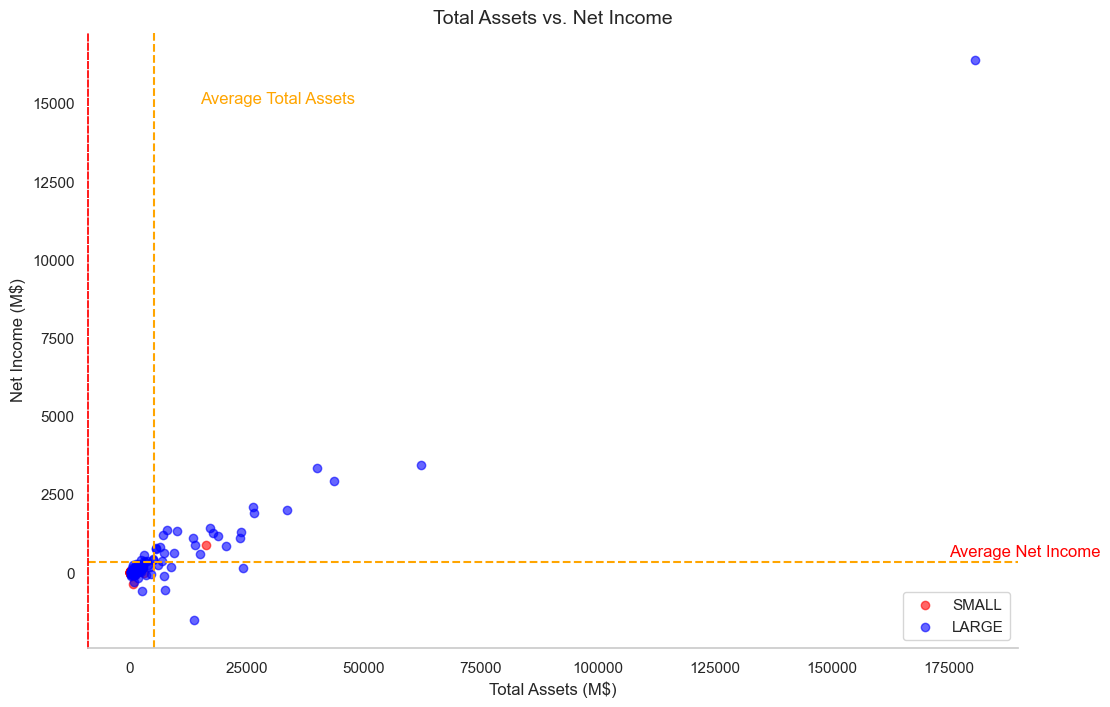

In [340]:
plt.figure(figsize=(12, 8))
colors = {'SMALL': 'red', 'LARGE': 'blue'}
for size in company['Company Size'].unique():
    subset = company[company['Company Size'] == size]
    plt.scatter(subset['Total Assets (M$)'], subset['Net Income (M$)'], 
                c=colors[size], label=size, alpha=0.6)

# Add horizontal and vertical lines for means
plt.axhline(y=company['Net Income (M$)'].mean(), color='orange', linestyle='--')
plt.axvline(x=company['Total Assets (M$)'].mean(), color='orange', linestyle='--')

plt.title("Total Assets vs. Net Income", fontsize=14)
plt.xlabel("Total Assets (M$)")
plt.ylabel("Net Income (M$)")

plt.text(15000, 15000, "Average Total Assets", color='orange', fontsize=12)
plt.text(175000, 500, "Average Net Income", color='red', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().spines['left'].set_color('red')
plt.gca().spines['left'].set_linestyle('--')

plt.grid(color='white')
plt.legend()
plt.show()

### 1h. (1 point) Which company has the least return on assets?

In [278]:
company

,Company Name,Total Assets (M$),Net Income (M$),# Employees,Return on Assets,Profit,Company Size
0,1-800-FLOWERS.COM,256,-4,2200,-0.015625,LOSS,SMALL
1,99 CENTS ONLY STORES,824,74,12000,0.089806,PROFIT,LARGE
2,A.C. MOORE ARTS & CRAFTS INC,237,-30,4710,-0.126582,LOSS,SMALL
3,ABERCROMBIE & FITCH -CL A,2948,150,85000,0.050882,PROFIT,LARGE
4,ADVANCE AUTO PARTS INC,3354,346,51017,0.103160,PROFIT,LARGE
...,...,...,...,...,...,...,...
162,WHOLE FOODS MARKET INC,3987,246,58300,0.061701,PROFIT,LARGE
163,WILLIAMS-SONOMA INC,2132,200,28000,0.093809,PROFIT,LARGE
164,WINN-DIXIE STORES INC,1838,29,49000,0.015778,PROFIT,LARGE
165,ZALE CORP,1160,-94,12800,-0.081034,LOSS,LARGE


In [284]:
company.loc[[company['Return on Assets'].idxmin()]]

,Company Name,Total Assets (M$),Net Income (M$),# Employees,Return on Assets,Profit,Company Size
123,SCHOOL SPECIALTY INC,638,-356,1919,-0.557994,LOSS,SMALL


### 1j. (1 point) Which company is the outlier on the plot? Hint: FInd the company with the highest total assets?

In [288]:
company.loc[[company['Total Assets (M$)'].idxmax()]]

,Company Name,Total Assets (M$),Net Income (M$),# Employees,Return on Assets,Profit,Company Size
159,WAL-MA2:A111ART STORES INC,180663,16389,2100000,0.090716,PROFIT,LARGE


## Problem 2: Data Analytics Jobs in the USA

Soon you will start getting ready to explore the job market for data analyst/data scientist positions (internship and full time). In this case study, we will assess the job market in the USA, and in particular, we are interested to learn which business sectors and companies are looking to hire data analysts in different US states. 

The data set (`DataAnalyst.csv`) is available for download from blackboard. It is scrapped and cleaned from GlassDoor using this [web scrapper](https://github.com/picklesueat/data_jobs_data/blob/master/glass_scraper.py). 

The dataset has a sample of 2,253 job listings. The following table describes some of the variables necessary to answer the questions in this quiz:

|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`Job Title`| listing's job title
|`Job Description`| listing's job description
|`Rating`| the company's rating on Glassdoor
|`Company Name` | the listing company's name
|`City` | city location of the company 
|`State`| state location of the company
|`Size` | number of employees in the company 
|`Founded`| the year the company was founded
|`Type of ownership`| is the company private, public, non-profit, etc.?
|`Industry`| primary business activity 
|`Sector`| economic sector classification for the company
|`Revenue`| company's income generated from business operations
|`Competitors`| the company's list of competitors
|`Min_Salary`| the minimum salary listing for the position
|`Max_Salary`| the maximum salary listing for the position

**In this homework, we assume that the sample of 2,253 job listings is a representative of the population of job listings in the USA.**

In [5]:
# read the data

jobs = pd.read_csv('DataAnalyst.csv')
jobs

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,New York,NY,201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,37,66
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,NY,10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,NY,1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,NY,201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,New York,NY,501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,37,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.",Denver,CO,51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,78,104
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,Centennial,CO,10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",78,104
2250,"Technical Business Analyst (SQL, Data analytic...","Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,Denver,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,104
2251,"Data Analyst 3, Customer Experience",Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,Centennial,CO,201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,78,104


In [104]:
jobs.describe()

,Rating,Founded,Min_Salary,Max_Salary
count,1981.000000,1593.000000,2253.000000,2253.000000
mean,3.731903,1978.362837,54.242787,89.939192
std,0.670332,47.822289,19.604393,29.370336
min,1.000000,1682.000000,0.000000,0.000000
25%,3.300000,1970.000000,41.000000,70.000000
50%,3.700000,1997.000000,50.000000,87.000000
75%,4.100000,2006.000000,64.000000,104.000000
max,5.000000,2019.000000,113.000000,190.000000


### 2a. (1 point) What are the top 4 sectors with the highest count of job listings?

In [31]:
jobs['Sector'].value_counts().head(4)

Sector
Information Technology    570
Business Services         524
Finance                   169
Health Care               151
Name: count, dtype: int64

### 2b. (2 point) Suppose that you want to focus your job search in the following sectors (Information Technology, Business Services, Finance,  Health Care). Create a subset of the given dataset, using 'isin', that include only these 4 sectors with their data (include all variables).

### Name the subset dataframe `mydata`.

In [303]:
jobs['Sector'].value_counts().head(4).index

Index(['Information Technology', 'Business Services', 'Finance',
       'Health Care'],
      dtype='object', name='Sector')

In [305]:
mydata = jobs[jobs['Sector'].isin(jobs['Sector'].value_counts().head(4).index)]
mydata

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,NY,10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,NY,1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,NY,201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,37,66
5,Data Analyst,About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,New York,NY,1001 to 5000 employees,2014.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,37,66
6,Business/Data Analyst (FP&A),Two Sigma is a different kind of investment ma...,4.4,Two Sigma,New York,NY,1001 to 5000 employees,2001.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,37,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,Marketing/Communications - Data Analyst-Marketing,Job Description\nJob Title: Marketing/Communic...,4.1,APN Software Services Inc.,Broomfield,CO,51 to 200 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),NaN,78,104
2248,RQS - IHHA - 201900004460 -1q Data Security An...,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.",Denver,CO,51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,78,104
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,Centennial,CO,10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",78,104
2251,"Data Analyst 3, Customer Experience",Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,Centennial,CO,201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,78,104


### 2c. (2 points) You are given the range of salary for each job listing (minimum and maximum salary). Add a new variable to `mydata` to estimate the salary of the for each of the listing in the dataset. The estimate salary is the average of the given minimum and maximum salary. #Hint: Create a copy of the dataset mydata to avoid the "warning message"

*Name the the new column `Est_Salary`.*

What is the **average**, and **standard deviation** for the estimated salary among the 4 sectors listed in `mydata` dataframe?

In [307]:
mydata_copy = mydata.copy()

mydata_copy['Est_Salary'] = (mydata_copy['Min_Salary'] + mydata_copy['Max_Salary']) / 2

salary_stats = mydata_copy.groupby('Sector')['Est_Salary'].agg(['mean', 'std'])
salary_stats

,mean,std
Sector,,
Business Services,72.135496,22.411196
Finance,67.644970,22.545747
Health Care,72.807947,26.554150
Information Technology,74.247368,25.520887


In [309]:
mydata_copy

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,Est_Salary
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,NY,10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37,66,51.5
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,NY,1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,37,66,51.5
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,NY,201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,37,66,51.5
5,Data Analyst,About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,New York,NY,1001 to 5000 employees,2014.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,37,66,51.5
6,Business/Data Analyst (FP&A),Two Sigma is a different kind of investment ma...,4.4,Two Sigma,New York,NY,1001 to 5000 employees,2001.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,37,66,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,Marketing/Communications - Data Analyst-Marketing,Job Description\nJob Title: Marketing/Communic...,4.1,APN Software Services Inc.,Broomfield,CO,51 to 200 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),NaN,78,104,91.0
2248,RQS - IHHA - 201900004460 -1q Data Security An...,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.",Denver,CO,51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,78,104,91.0
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,Centennial,CO,10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",78,104,91.0
2251,"Data Analyst 3, Customer Experience",Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,Centennial,CO,201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,78,104,91.0


### 2d. (2 points) Create a side-by-side boxplot to show the distribution of salaries among the four hiring sectors (listed in `mydata`). Use "Set2 as the palette colors. 

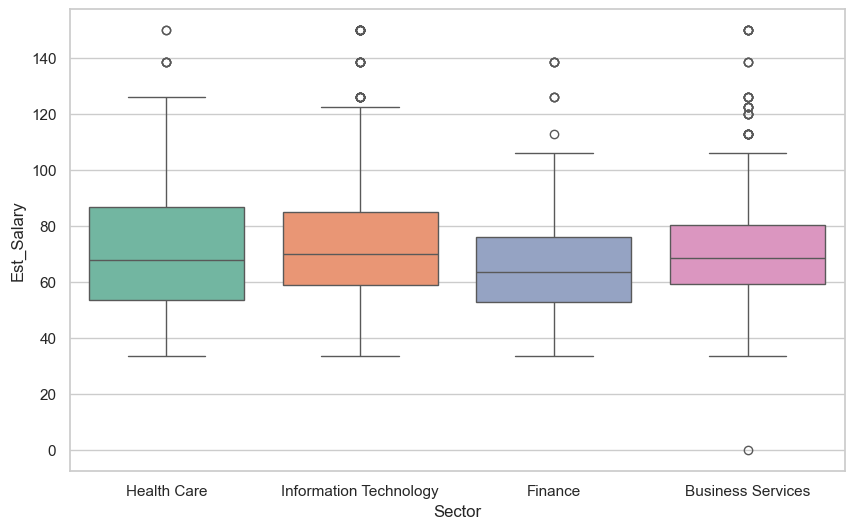

In [311]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='Est_Salary', data=mydata_copy, hue='Sector', palette='Set2', legend=False)
plt.show()

###  (1 point) What does the boxplot tell you about the salaries in these industries for data analysts?

1. Health Care
   - The median salary is relatively high compared to other sectors.
   - There is a wide interquartile range (IQR), indicating variability in salaries.
   - A few outliers suggest some positions offer significantly higher salaries.
2. Information Technology
   - Slightly lower than Health Care but still competitive.
   - The IQR is narrower, indicating more consistent salaries.
   - Several high outliers suggest opportunities for higher earnings.
3. Finance
   - Comparable to Information Technology, with a similar range.
   - The distribution is compact, showing less variability.
   - Fewer outliers compared to other sectors.
4. Business Services
   - Similar to Finance, with a slightly wider spread.
   - Moderate variability in salaries.
   - Presence of several high outliers.

### 2e. (2 points) List the company names (distinct) in the **Information Technology** sector that has job postings with estimated salaries above 100K dollars?

In [315]:
it_high_salary = mydata_copy[(mydata_copy['Sector'] == 'Information Technology') & (mydata_copy['Est_Salary'] > 100)]
it_high_salary

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,Est_Salary
340,"Sr. Data Analyst, Retail Media",Who we are\nCriteo (NASDAQ: CRTO) is the globa...,3.9,Criteo,New York,NY,1001 to 5000 employees,2005.0,Company - Public,Internet,Information Technology,$2 to $5 billion (USD),"MediaMath, Conversant, AppNexus",77,132,104.5
344,TX Healthcare Data/Reporting Analyst,Job Description:\n\nPosition Summary\nA data m...,4.8,Tekfortune Inc.,New York,NY,1 to 50 employees,NaN,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,NaN,77,132,104.5
346,Data Analyst Junior,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC",New York,NY,51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,77,132,104.5
347,SR. Power BI with DAX - Data Analyst,Current position is Full Time with the End Cli...,3.7,"8K Miles Software Services, Inc.",New York,NY,201 to 500 employees,2008.0,Company - Public,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),NaN,77,132,104.5
349,"Senior Solutions Analyst, Data Specialist",ABOUT VTSVTS is the fastest-growing Proptech c...,4.2,VTS,New York,NY,201 to 500 employees,2011.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$50 to $100 million (USD),NaN,77,132,104.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,Data Analyst,Job Description\nTitle: Data Scientist/Clinica...,4.1,LeadStack,Foster City,CA,51 to 200 employees,2016.0,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,NaN,93,159,126.0
1961,Senior Data Analyst,"About TaskRabbit\n\n\nAt TaskRabbit, we want t...",4.1,TaskRabbit,San Francisco,CA,201 to 500 employees,2008.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,NaN,93,159,126.0
1962,Junior Data Analyst,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC",San Francisco,CA,51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,93,159,126.0
1963,Business Data Analyst,Role: Business Data Analyst\n\nLocation: San F...,3.9,Diverse Lynx,San Francisco,CA,501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,93,159,126.0


In [317]:
it_companies = it_high_salary['Company Name'].unique()
it_companies

array(['Criteo', 'Tekfortune Inc.', 'Staffigo Technical Services, LLC',
       '8K Miles Software Services, Inc.', 'VTS',
       'RMS Computer Corporation', 'Reliable Software Resources',
       'Oracle', 'Avani Technology Solutions', 'Primesoft',
       'Systemart LLC', 'TechProjects', 'Information Technology Partners',
       'TikTok', 'Synchronous Solutions, Inc', 'HR Pundits',
       'Softpath System LLC', 'Motorola Solutions', 'Capgemini', 'NVIDIA',
       'Risk Management Solutions (RMS)', 'LeanData', 'Alteryx',
       'L&T Infotech', 'IntraEdge', 'Joomag, Inc.', 'Moveworks', 'Ursus',
       'Nuro', 'TalentBurst, Inc.', 'BayOne Solutions', 'Logic Planet',
       'Netflix', 'Diverse Lynx', 'Adwait Algorithm', 'Netflix, Inc.',
       'Apple', 'Collabera', 'Crystal Equation', 'Frontend Arts',
       'Poshmark', 'Zolon Tech Solutions Inc.', 'Lodestone', 'SAP',
       'Calsoft Labs', 'Coinbase', 'Trifacta', 'Wilbur Labs',
       'User Testing', 'Priceonomics', 'BOLD', 'Flatiron Health

### 2f. (2 points) List the company names (unique) in the **Information Technology**  or **Finance** sector that have job postings with estimated salaries above 100K dollars?

In [319]:
it_finance_high_salary = mydata_copy[((mydata_copy['Sector'] == 'Information Technology') | (mydata_copy['Sector'] == 'Finance')) & (mydata_copy['Est_Salary'] > 100)]
it_finance_high_salary

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,Est_Salary
340,"Sr. Data Analyst, Retail Media",Who we are\nCriteo (NASDAQ: CRTO) is the globa...,3.9,Criteo,New York,NY,1001 to 5000 employees,2005.0,Company - Public,Internet,Information Technology,$2 to $5 billion (USD),"MediaMath, Conversant, AppNexus",77,132,104.5
344,TX Healthcare Data/Reporting Analyst,Job Description:\n\nPosition Summary\nA data m...,4.8,Tekfortune Inc.,New York,NY,1 to 50 employees,NaN,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,NaN,77,132,104.5
345,Senior SQL Data Warehouse Analyst,Job PurposeThe Senior Content Control Analyst ...,2.8,"Intercontinental Exchange, Inc.",New York,NY,1001 to 5000 employees,2000.0,Company - Public,Investment Banking & Asset Management,Finance,$5 to $10 billion (USD),NaN,77,132,104.5
346,Data Analyst Junior,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC",New York,NY,51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,77,132,104.5
347,SR. Power BI with DAX - Data Analyst,Current position is Full Time with the End Cli...,3.7,"8K Miles Software Services, Inc.",New York,NY,201 to 500 employees,2008.0,Company - Public,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),NaN,77,132,104.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,"Senior Data Analyst, Member Services",Chime is the largest and fastest-growing playe...,4.8,Chime,San Francisco,CA,201 to 500 employees,2013.0,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,NaN,93,159,126.0
1961,Senior Data Analyst,"About TaskRabbit\n\n\nAt TaskRabbit, we want t...",4.1,TaskRabbit,San Francisco,CA,201 to 500 employees,2008.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,NaN,93,159,126.0
1962,Junior Data Analyst,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC",San Francisco,CA,51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,93,159,126.0
1963,Business Data Analyst,Role: Business Data Analyst\n\nLocation: San F...,3.9,Diverse Lynx,San Francisco,CA,501 to 1000 employees,2002.0,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,93,159,126.0


In [321]:
it_finance_companies = it_finance_high_salary['Company Name'].unique()
it_finance_companies

array(['Criteo', 'Tekfortune Inc.', 'Intercontinental Exchange, Inc.',
       'Staffigo Technical Services, LLC',
       '8K Miles Software Services, Inc.', 'VTS',
       'RMS Computer Corporation', 'J.P. Morgan',
       'Sumitomo Mitsui Banking Corporation (SMBC)', 'Geller & Company',
       'Reliable Software Resources', 'The Bank of New York Mellon',
       'Oracle', 'Avani Technology Solutions', 'Primesoft',
       'Systemart LLC', 'TechProjects', 'Information Technology Partners',
       'TikTok', 'Synchronous Solutions, Inc', 'HR Pundits',
       'Softpath System LLC', 'Motorola Solutions', 'Capgemini', 'Tempus',
       'NVIDIA', 'Risk Management Solutions (RMS)', 'LeanData', 'Alteryx',
       'L&T Infotech', 'IntraEdge', 'Joomag, Inc.', 'Moveworks', 'Ursus',
       'Nuro', 'TalentBurst, Inc.', 'BayOne Solutions', 'Logic Planet',
       'Netflix', 'Diverse Lynx', 'Adwait Algorithm', 'Netflix, Inc.',
       'Apple', 'Collabera', 'Crystal Equation', 'Frontend Arts',
       'Poshmar

### 2g. (2 points) Create a new variable, using Lambda, to re-classigy ownership into 'NonProfit' if the companies are "Nonprofit Organization" or, "College /University", "Govt" if they are "Government" and all others as "For Profit." Hint: Create a copy of the dataset mydata to avoid the "warning message"

In [323]:
mydata_copy['Ownership'] = mydata_copy['Type of ownership'].apply(lambda x: 'NonProfit' if x in ['Nonprofit Organization', 'College / University'] else ('Govt' if x == 'Government' else 'For Profit'))

In [325]:
mydata_copy

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,Est_Salary,Ownership
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,NY,10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37,66,51.5,NonProfit
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,NY,1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,37,66,51.5,For Profit
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,NY,201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,37,66,51.5,For Profit
5,Data Analyst,About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,New York,NY,1001 to 5000 employees,2014.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,37,66,51.5,For Profit
6,Business/Data Analyst (FP&A),Two Sigma is a different kind of investment ma...,4.4,Two Sigma,New York,NY,1001 to 5000 employees,2001.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,37,66,51.5,For Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,Marketing/Communications - Data Analyst-Marketing,Job Description\nJob Title: Marketing/Communic...,4.1,APN Software Services Inc.,Broomfield,CO,51 to 200 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),NaN,78,104,91.0,For Profit
2248,RQS - IHHA - 201900004460 -1q Data Security An...,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.",Denver,CO,51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,78,104,91.0,For Profit
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,Centennial,CO,10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",78,104,91.0,For Profit
2251,"Data Analyst 3, Customer Experience",Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,Centennial,CO,201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,78,104,91.0,For Profit


### 2h. (3 points) Using Seaborn, create a point-plot to show the Est_Salary(y-axis) by sectors(x-axis) and distinguished by "Ownership."

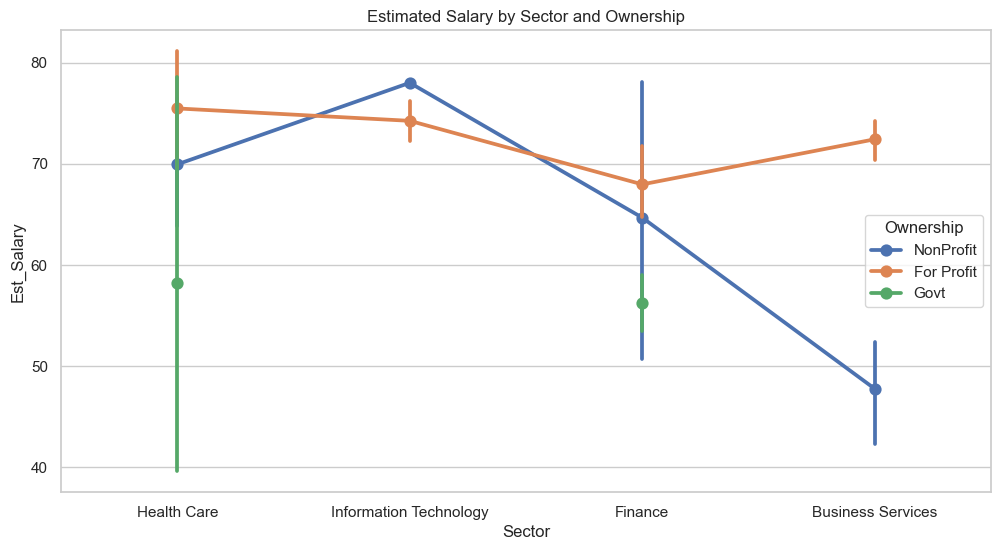

In [329]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='Sector', y='Est_Salary', hue='Ownership', data=mydata_copy)
plt.title('Estimated Salary by Sector and Ownership')
plt.show()

### (1 point) Which sector can be expected to have the greatest variation in estimated salaries, and which ownership-type has the gratest variation in estimated salaries?

1. Sector with Greatest Variation
   - Health Care: This sector shows the greatest variation in estimated salaries, as indicated by the wide interquartile range (IQR) and presence of outliers.
2. Ownership-Type with Greatest Variation
   - NonProfit: In the line plot, NonProfit organizations exhibit the greatest variation in estimated salaries across sectors, as shown by the larger spread and error bars.

### 2i. (3 points) Use the dataset with the 4 sectors (`mydata`) to create a dot plot (lollipop plot) that shows the top 15 states with the highest average salaries.

*Name the dataframe `top15states`*

*The resulting dataframe should have two columns (`State`, `Avg Salary`), where `Avg Salary` is the mean salary in the corresponding `State`*

*Use two different colors of your choice to distingusih between the states with avegrage salary larger than \$75K and thos with average salary less than \$75K.* 

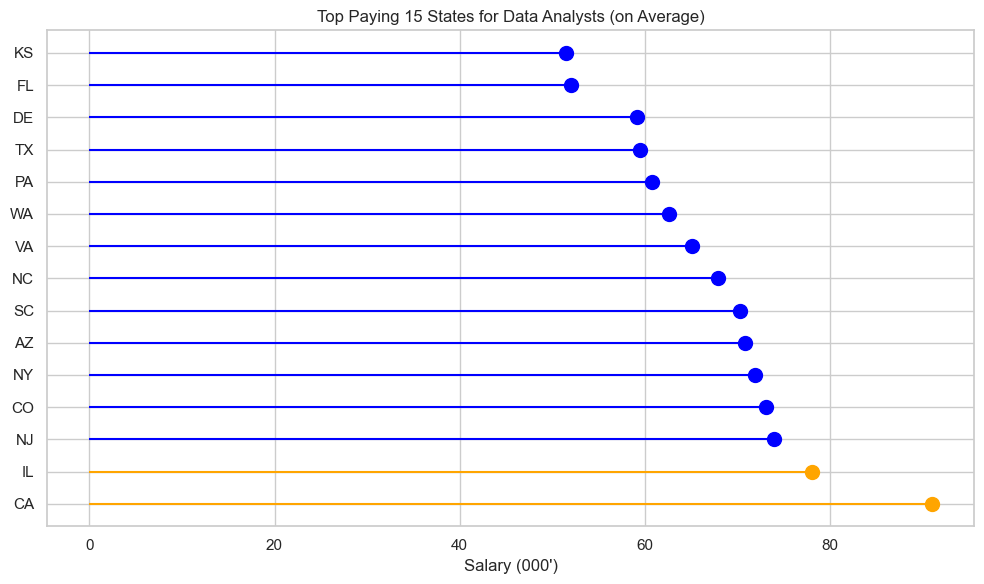

In [332]:
top_15_states = mydata_copy.groupby('State')['Est_Salary'].mean().sort_values(ascending=False).head(15).reset_index()
top_15_states.columns = ['State', 'Avg Salary']

colors = ['orange' if salary > 75 else 'blue' for salary in top_15_states['Avg Salary']]

plt.hlines(y=top_15_states['State'], xmin=0, xmax=top_15_states['Avg Salary'], color=colors)

for i, (salary, state) in enumerate(zip(top_15_states['Avg Salary'], top_15_states['State'])):
    plt.plot(salary, state, 'o', color=colors[i], markersize=10)

plt.xlabel('Salary (000\')')
plt.title('Top Paying 15 States for Data Analysts (on Average)')
plt.tight_layout()
plt.show()